In [1]:
%%capture
%pip install qldpc

In [2]:
import networkx as nx
import numpy as np

from qldpc import codes
from qldpc.objects import Pauli

np.set_printoptions(linewidth=200)

# Classical linear codes: basics

In [3]:
# ring code: repetition code with periodic boundary conditions
ring_code = codes.RingCode(5)
print(ring_code)
print()
print("parity checks:", ring_code.num_checks)
print("block length (= number of data bits):", len(ring_code))  # also ring_code.num_bits
print("dimension (= number of encoded bits):", ring_code.dimension)
print("distance:", ring_code.get_distance())
print()
print("code parameters:", ring_code.get_code_params())

RingCode on 5 bits, with parity check matrix
[[1 1 0 0 0]
 [0 1 1 0 0]
 [0 0 1 1 0]
 [0 0 0 1 1]
 [1 0 0 0 1]]

parity checks: 5
block length (= number of data bits): 5
dimension (= number of encoded bits): 1
distance: 5

code parameters: (5, 1, 5)


In [4]:
# the ring code is equivalent to the ordinary repetition code
rep_code = codes.RepetitionCode(len(ring_code))  # repetition code with same block length
print(rep_code)
print()
print(codes.ClassicalCode.equiv(ring_code, rep_code))

RepetitionCode on 5 bits, with parity check matrix
[[1 1 0 0 0]
 [0 1 1 0 0]
 [0 0 1 1 0]
 [0 0 0 1 1]]

True


In [5]:
# Hamming code: columns of parity check matrix = nonzero bitstrings
hamming_code = codes.HammingCode(3)
print(hamming_code)
print()
print(hamming_code.get_code_params())

HammingCode on 7 bits, with parity check matrix
[[0 0 0 1 1 1 1]
 [0 1 1 0 0 1 1]
 [1 0 1 0 1 0 1]]

(7, 4, 3)


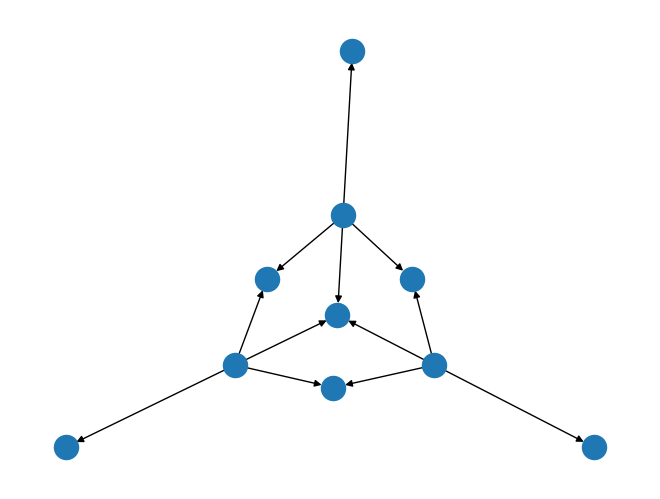

In [6]:
# Tanner graph of the Hamming code, with edges pointing from check bits to data bits
nx.draw_spectral(hamming_code.graph)

In [7]:
# random classical code on 5 bits with 3 checks
code = codes.ClassicalCode.random(5, 3, seed=0)
print(code)
print()
print(code.get_code_params())

ClassicalCode on 5 bits, with parity check matrix
[[1 0 0 0 1]
 [0 0 1 1 0]
 [1 1 0 1 1]]

(5, 2, 2)


In [8]:
# random code over trinary field
code = codes.ClassicalCode.random(5, 3, field=3, seed=1)
print(code)
print()
print(code.get_code_params())

ClassicalCode on 5 symbols over GF(3), with parity check matrix
[[0 2 1 1 0]
 [0 0 2 2 2]
 [1 1 1 0 1]]

(5, 2, 3)


# Quantum codes: basics

In [9]:
# smallest quantum error-correcting code
five_qubit_code = codes.FiveQubitCode()
print(five_qubit_code)
print()
print(five_qubit_code.get_strings())

FiveQubitCode on 5 qubits, with parity check matrix
[[1 0 0 1 0 0 1 1 0 0]
 [0 1 0 0 1 0 0 1 1 0]
 [1 0 1 0 0 0 0 0 1 1]
 [0 1 0 1 0 1 0 0 0 1]]

['X Z Z X I', 'I X Z Z X', 'X I X Z Z', 'Z X I X Z']


In [10]:
# surface code as a hypergraph product code
rep_code = codes.RepetitionCode(3)
surface_code = codes.HGPCode(rep_code, rep_code)
print(surface_code)
print()
print(surface_code.get_code_params())

HGPCode on 13 qubits
X-type parity checks:
[[1 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 1 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 1 0 0 1 0 0 0 1]]
Z-type parity checks:
[[1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1]]

(13, 1, 3)


In [11]:
# logical X and Z operators
# each operator is a bitstring of length num_qubits, indicating the support of single-qubit X and Z operators
ops_x = surface_code.get_logical_ops(Pauli.X)
ops_z = surface_code.get_logical_ops(Pauli.Z)
print("logical X-type ops:", ops_x)
print("logical Z-type ops:", ops_z)

logical X-type ops: [[1 1 1 0 0 0 0 0 0 0 0 0 0]]
logical Z-type ops: [[1 0 0 1 0 0 1 0 0 0 0 0 0]]


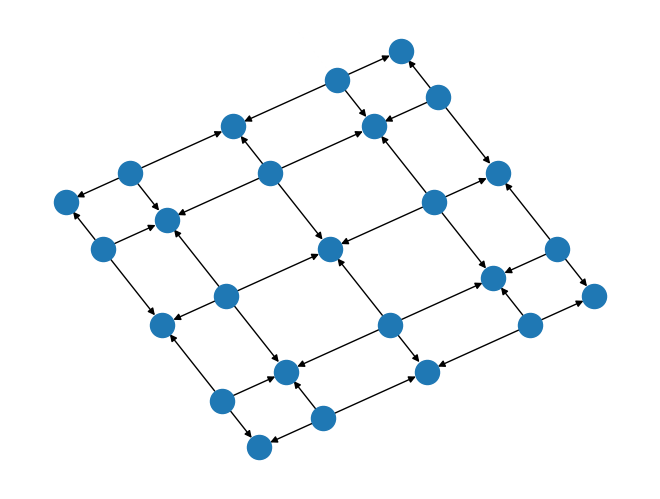

In [12]:
# surface code Tanner graph -- also the qubit layout!
nx.draw_spectral(surface_code.graph)

In [13]:
# toric code as a hypergraph product code
ring_code = codes.RingCode(3)
toric_code = codes.HGPCode(ring_code, ring_code)
print(toric_code)
print()
print(toric_code.get_code_params())

# there are now two logical Pauli-X and Pauli-Z operators!
ops_x = toric_code.get_logical_ops(Pauli.X)
ops_z = toric_code.get_logical_ops(Pauli.Z)
assert len(ops_x) == len(ops_z) == toric_code.dimension == 2

HGPCode on 18 qubits
X-type parity checks:
[[1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1]]
Z-type parity checks:
[[1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1]]

(18, 2, 3)


In [14]:
# compute code distance exactly (with exponential runtime)
print("exact distance:", toric_code.get_distance())

# compute an upper bound to the code distance with 100 Monte Carlo trials
print("upper bound: <=", toric_code.get_distance(bound=100))

exact distance: 3
upper bound: <= 3


# Quantum code constructions

In [15]:
# construct the quantum Steane code out of classical Hamming codes
inner_code = codes.HammingCode(3)
steane_code = codes.CSSCode(inner_code, inner_code)
print(steane_code)
print()
print(
    "same as built-in construction:",
    np.array_equal(steane_code.matrix, codes.SteaneCode().matrix),
)

CSSCode on 7 qubits
X-type parity checks:
[[0 0 0 1 1 1 1]
 [0 1 1 0 0 1 1]
 [1 0 1 0 1 0 1]]
Z-type parity checks:
[[0 0 0 1 1 1 1]
 [0 1 1 0 0 1 1]
 [1 0 1 0 1 0 1]]

same as built-in construction: True
